# Python Basic Dataframe

[Lecture](https://www.youtube.com/watch?v=rku5rZxS0AA&list=PLG19vXLQHvSAufDFgZEFAYQEwMJXklnQV&index=1)

In [2]:
import pandas as pd               # dataframe 
import numpy as np                # array and matrix math
import os                         # operation system
import matplotlib.pyplot as plt   # plotting

**Select working directory**

In [10]:
os.chdir('GeoDataSets/')

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/2D_MV_200wells.csv')

In [12]:
df.head()

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


## Statistics

In [16]:
df.describe()

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,2053.400000,1876.15000,1.330000,0.149300,25.287462,3.000435
std,1113.524641,1137.58016,0.471393,0.032948,64.470135,0.592201
min,25.000000,35.00000,1.000000,0.050000,0.015820,2.009000
25%,1112.500000,920.00000,1.000000,0.132175,1.366750,2.483250
50%,2160.000000,1855.00000,1.000000,0.150150,4.825500,2.964500
75%,2915.000000,2782.50000,2.000000,0.174200,14.597000,3.527000
max,3955.000000,3995.00000,2.000000,0.223200,463.641000,3.984000


In [15]:
df.describe(percentiles=[0.1,0.9]) # percentiles = [lower quatile, upper quatile]

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,2053.400000,1876.15000,1.330000,0.149300,25.287462,3.000435
std,1113.524641,1137.58016,0.471393,0.032948,64.470135,0.592201
min,25.000000,35.00000,1.000000,0.050000,0.015820,2.009000
10%,414.000000,364.00000,1.000000,0.106100,0.262290,2.191500
50%,2160.000000,1855.00000,1.000000,0.150150,4.825500,2.964500
90%,3510.000000,3475.00000,2.000000,0.190140,56.534400,3.833600
max,3955.000000,3995.00000,2.000000,0.223200,463.641000,3.984000


In [17]:
type(df.describe(percentiles=[0.1,0.9]))

pandas.core.frame.DataFrame

In [23]:
df.describe(percentiles=[0.1,0.9]).T

,count,mean,std,min,10%,50%,90%,max
X,200.0,2053.400000,1113.524641,25.00000,414.00000,2160.00000,3510.00000,3955.0000
Y,200.0,1876.150000,1137.580160,35.00000,364.00000,1855.00000,3475.00000,3995.0000
facies_threshold_0.3,200.0,1.330000,0.471393,1.00000,1.00000,1.00000,2.00000,2.0000
porosity,200.0,0.149300,0.032948,0.05000,0.10610,0.15015,0.19014,0.2232
permeability,200.0,25.287462,64.470135,0.01582,0.26229,4.82550,56.53440,463.6410
acoustic_impedance,200.0,3.000435,0.592201,2.00900,2.19150,2.96450,3.83360,3.9840


## Rename Columns

In [24]:
df = df.rename(columns={'facies_threshold_0.3': 'facies','permeability':'perm','acoustic_impedance':'ai'}) # rename columns of the 
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


## Copying 
1. Shallow copy - point same memory, change one and both are changed
2. Deep copy - new copy in memory, change onely one

In [26]:
# 2. deep copy
deep_copy = df.copy(deep=True)
deep_copy.loc[4, 'ai'] = 4.0
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


In [27]:
# 1. shallow copy
shallow_copy = df.copy(deep=False)
shallow_copy.loc[3, 'ai'] = 4.0
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,4.000
4,1835,35,1,0.1766,7.123,3.979


## Add New Feature

In [30]:
zeros = np.zeros(len(df))
df['zeros'] = zeros
df.head()

,X,Y,facies,porosity,perm,ai,zeros
0,565,1485,1,0.1184,6.170,2.009,0.0
1,2585,1185,1,0.1566,6.275,2.864,0.0
2,2065,2865,2,0.1920,92.297,3.524,0.0
3,3575,2655,1,0.1621,9.048,4.000,0.0
4,1835,35,1,0.1766,7.123,3.979,0.0


In [32]:
df = df.drop('zeros', axis=1)
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,4.000
4,1835,35,1,0.1766,7.123,3.979


## Remove a sample

In [34]:
df = df.drop(3, axis=0)      # Remove index no 3 row
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
4,1835,35,1,0.1766,7.123,3.979
5,3375,2525,1,0.1239,1.468,2.337


## Feature Engineering

In [35]:
df['porosity100'] = df['porosity']*100          # add a new column with porosity in percentage
df['permpor'] = df['perm']/df['porosity']       # add a new feature with ratio of perm / por 
df.head()

,X,Y,facies,porosity,perm,ai,porosity100,permpor
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486
1,2585,1185,1,0.1566,6.275,2.864,15.66,40.070243
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542
4,1835,35,1,0.1766,7.123,3.979,17.66,40.334088
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265


## Conditional Manipulation

In [36]:
df['tporosity'] = np.where(df['porosity']>=0.12, 'high', 'low') # make a new categorical feature
df.head()

,X,Y,facies,porosity,perm,ai,porosity100,permpor,tporosity
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low
1,2585,1185,1,0.1566,6.275,2.864,15.66,40.070243,high
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high
4,1835,35,1,0.1766,7.123,3.979,17.66,40.334088,high
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265,high


### Conditional Manipuluation more than One Feature

In [37]:
df['perm_cutoff'] = np.where(df['porosity']>=0.12, df['perm'],0.0001) # new feature with conditional truncation
df.head()

,X,Y,facies,porosity,perm,ai,porosity100,permpor,tporosity,perm_cutoff
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low,0.0001
1,2585,1185,1,0.1566,6.275,2.864,15.66,40.070243,high,6.2750
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.2970
4,1835,35,1,0.1766,7.123,3.979,17.66,40.334088,high,7.1230
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265,high,1.4680


## Finding Missing Data

In [43]:
df.loc[1,'porosity'] = np.NaN                   # add a NaN / missing value in our table
print('Number of null values in our DataFrame = ', str(df.isnull().sum().sum())) # count missing values 
nan_rows = df[df['porosity'].isnull()]          # find the sample with missing values
nan_rows

Number of null values in our DataFrame =  1


,X,Y,facies,porosity,perm,ai,porosity100,permpor,tporosity,perm_cutoff
1,2585,1185,1,NaN,6.275,2.864,15.66,40.070243,high,6.275


### Likewise Delection

In [44]:
df = df.dropna(how='any')
df.head()

,X,Y,facies,porosity,perm,ai,porosity100,permpor,tporosity,perm_cutoff
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low,0.0001
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.2970
4,1835,35,1,0.1766,7.123,3.979,17.66,40.334088,high,7.1230
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265,high,1.4680
6,2295,1325,1,0.1790,31.933,3.491,17.90,178.396648,high,31.9330


## Conditional Slicing

In [45]:
df_extract = df.loc[(df['porosity'] > 0.12) & (df['perm'] > 10.0)] # extract with multiple conditions to a new table
df_extract.head()

,X,Y,facies,porosity,perm,ai,porosity100,permpor,tporosity,perm_cutoff
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.297
6,2295,1325,1,0.1790,31.933,3.491,17.90,178.396648,high,31.933
7,3715,3045,2,0.1914,116.781,2.187,19.14,610.141066,high,116.781
13,545,3765,1,0.1817,14.311,3.045,18.17,78.761695,high,14.311
15,1385,2415,2,0.1774,22.578,2.711,17.74,127.271702,high,22.578


## Making New DataFrame

In [46]:
por = df['porosity'].values                     # extract porosity column as vector
perm = df['perm'].values                        # extract permeability column as vector
df_new = pd.DataFrame({'porosity': por, 'permeability': perm}) # make a new DataFrame from the vectors
df_new.head()

,porosity,permeability
0,0.1184,6.170
1,0.1920,92.297
2,0.1766,7.123
3,0.1239,1.468
4,0.1790,31.933


## Basic Plotting

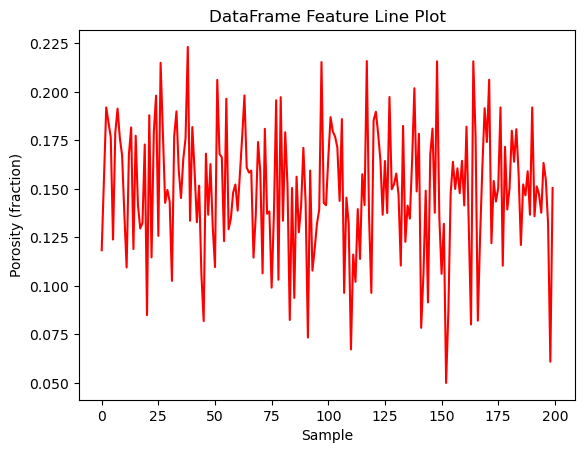

In [47]:
df['porosity'].plot(kind='line',color='red')    # make a line plot
plt.ylabel('Porosity (fraction)'); plt.xlabel('Sample'); plt.title('DataFrame Feature Line Plot'); plt.show()

### Histograms

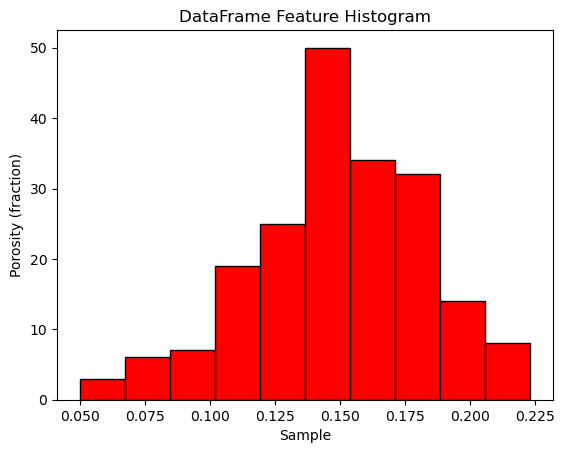

In [48]:
df['porosity'].plot(kind = 'hist',color='red',edgecolor='black') # plot a histogram
plt.ylabel('Porosity (fraction)'); plt.xlabel('Sample'); plt.title('DataFrame Feature Histogram'); plt.show()

## Accessing The DataFrame Members

In [49]:
print(df.index)                                 # get information about the index
print(df.columns)                               # get the list of feature names
print(df.values)                                # get the 2D array with all the table data

Index([  0,   2,   4,   5,   6,   7,   8,   9,  10,  11,
       ...
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
      dtype='int64', length=198)
Index(['X', 'Y', 'facies', 'porosity', 'perm', 'ai', 'porosity100', 'permpor',
       'tporosity', 'perm_cutoff'],
      dtype='object')
[[565 1485 1 ... 52.111486486486484 'low' 0.0001]
 [2065 2865 2 ... 480.71354166666663 'high' 92.297]
 [1835 35 1 ... 40.33408833522084 'high' 7.123]
 ...
 [375 1705 1 ... 18.198334595003786 'high' 2.404]
 [3795 535 1 ... 0.2596848325673014 'low' 0.0001]
 [3455 1645 1 ... 6.578073089700997 'high' 0.99]]


## Retrieving Values DataFrames with [MY_DATAFRAME].values()

In [50]:
por1 = df.values[0,3]                           # get the value for sample 1 of the 4th feature (porosity)
print('Porosity value for sample number 0 is ' + str(por1) + '.') 

Porosity value for sample number 0 is 0.1184.


## Convert Pandas DataFrame to Numpy Array

In [55]:
df_array = df.to_numpy()                        # copy the DataFrame to an ndarray
print('We just made a ' + str(type(df_array)))  
print('of shape ' + str(df_array.shape))

We just made a <class 'numpy.ndarray'>
of shape (198, 10)


**Note this is a deep copy. If we change the ndarray, the DataFrame is not updated.**

In [58]:
df_array[2,1] = 10000                           # change an element of the ndarray
df.head(n=3)                                    # check the original DataFrame

,X,Y,facies,porosity,perm,ai,porosity100,permpor,tporosity,perm_cutoff
0,565,1485,1,0.1184,6.170,2.009,11.84,52.111486,low,0.0001
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.2970
4,1835,35,1,0.1766,7.123,3.979,17.66,40.334088,high,7.1230


## Python Built-in Functions on DataFrames

In [59]:
print('The DataFrame has ' + str(len(df)) + ' samples.') # number of samples
print('The DataFrame\'s features are ' + str(list(df)) + '.') # list of the features (columns)

The DataFrame has 198 samples.
The DataFrame's features are ['X', 'Y', 'facies', 'porosity', 'perm', 'ai', 'porosity100', 'permpor', 'tporosity', 'perm_cutoff'].


## Directly Editing DataFrames

In [63]:
print('The value of the first porosity sample was ' + str(df.at[0,'porosity']))
df.at[0,'porosity'] = 0.2000                          # set the value for sample 1 of the porosity feature
print('The value of porosity for sample 0 is now ' + str(df.loc[0,'porosity']) + '.')
df.head()

The value of the first porosity sample was 0.1184
The value of porosity for sample 0 is now 0.2.


,X,Y,facies,porosity,perm,ai,porosity100,permpor,tporosity,perm_cutoff
0,565,1485,1,0.2000,6.170,2.009,11.84,52.111486,low,0.0001
2,2065,2865,2,0.1920,92.297,3.524,19.20,480.713542,high,92.2970
4,1835,35,1,0.1766,7.123,3.979,17.66,40.334088,high,7.1230
5,3375,2525,1,0.1239,1.468,2.337,12.39,11.848265,high,1.4680
6,2295,1325,1,0.1790,31.933,3.491,17.90,178.396648,high,31.9330


## Saving DataFrame to A File

In [64]:
df.to_csv("2D_MV_200wells_out.csv")             # write out the df DataFrame to a comma delimited file 